# Project: Wrangling and Analyze Data

## Data Gathering
## Loading Data

In [1]:
import requests
import numpy as np
import os

import pandas as pd
import tweepy
import time
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib.pyplot as plt                                     
%matplotlib inline
from matplotlib import cm as cm

import seaborn as sns 

## Load Csv File


In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df.shape

(2356, 17)

## Image prediction

In [5]:
# loading the data of image prediction
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
folder_name  = requests.get(url)
with open (url.split('/')[-1], mode='wb') as file:
    file.write(folder_name.content)

In [6]:
df_image_data = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Twitter_ json_Api 

In [7]:
# Download file using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Save the file
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [8]:
# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
df_tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data

## Standards 

### Data quality dimensions:

. Completeness

. Validity

. Accuracy

. Consistency

### Tidy data requirements:

Each variable forms a column

Each observation forms a row

Each type of observational unit forms a table



In [9]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
#Checking the rating values for  denominator
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
df_image_data.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
534,676936541936185344,https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg,1,Chesapeake_Bay_retriever,0.545286,True,Norwegian_elkhound,0.081482,True,space_heater,0.047391,False
624,680609293079592961,https://pbs.twimg.com/media/CXICiB9UwAE1sKY.jpg,1,French_bulldog,0.700764,True,Chihuahua,0.072390,True,American_Staffordshire_terrier,0.039619,True
1612,801538201127157760,https://pbs.twimg.com/media/Cx-itFWWIAAZu7l.jpg,1,Pembroke,0.550506,True,Cardigan,0.306612,True,Shetland_sheepdog,0.054230,True
1892,849336543269576704,https://pbs.twimg.com/media/C8lzFC4XcAAQxB4.jpg,1,patio,0.521788,False,prison,0.149544,False,restaurant,0.027153,False
640,681302363064414209,https://pbs.twimg.com/media/CXR44l9WcAAcG_N.jpg,1,frilled_lizard,0.326259,False,tailed_frog,0.104539,False,axolotl,0.072479,False


## My Favorite pet (black is gold)


In [17]:
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/CaBVE80WAAA8sGk.jpg')

### Quality issues
1. Merge the clean versions of archive, images, and twitter_counts_df dataframes Correct the dog types
2. The source column still has the HTML tags
3. Delete retweets
4. Remove columns no longer needed
5. Change tweet_id from an integer to a string
6. Change the timestamp to correct datetime format
7. Correct naming issues
8. Standardize dog ratings
9. Creating a new dog_breed column using the image prediction data

### Tidiness issues
1. doggo, floofer, pupper, puppo are all stages of dog, should be in one column

2. Dog stages are found in multiple columns, hence we should find a way to club all these variables into single column. This will reduce the dimensionality of the dataframe

## Cleaning Data
Define: convert our assessments into defined cleaning tasks.

Code: convert those definitions to code and run that code.

Test: test the dataset, visually or with code, to make sure the cleaning operations worked

In [18]:
# Make copies of original pieces of data
df=df.copy()
df_image_data=df_image_data.copy()
df_tweet_json=df_tweet_json.copy()

In [19]:
df_image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue #1:

#### Define:

Merge the clean versions of df ,df_image_data, and df_tweet_json dataframes

#### Code

In [20]:
from functools import reduce
df_merge= [df,df_image_data, df_tweet_json]
merge_dogs = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), df_merge)

#### Test

In [21]:
merge_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


### Issue #2:

#### Define

  Delete retweets

#### Code

In [22]:
merge_dogs = merge_dogs[np.isnan(merge_dogs.retweeted_status_id)]

#### Test

In [23]:
merge_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

## Issue 3

## Define

Split Junk Column

## Code

In [24]:
merge_dogs['dog_breed'] = merge_dogs['text'].str.extract('(doggo|floofebr|pupper|puppo)')

## Test

In [25]:
merge_dogs[['dog_breed', 'doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,dog_breed,doggo,floofer,pupper,puppo
156,NaN,None,None,None,None
1587,NaN,None,None,None,None
2031,NaN,None,None,None,None
963,NaN,None,None,None,None
1997,NaN,None,None,None,None
1181,NaN,None,None,None,None
1631,NaN,None,None,None,None
1403,pupper,None,None,pupper,None
1694,NaN,None,None,None,None
883,pupper,None,None,pupper,None


In [26]:
merge_dogs.dog_breed.value_counts()

pupper    223
doggo      72
puppo      28
Name: dog_breed, dtype: int64

## Issue 4

## Define

Change tweet_id from an integer to a string

## Code

In [27]:
merge_dogs['tweet_id'] = merge_dogs['tweet_id'].astype(str)

## Test

In [37]:
merge_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 no

## Issues 5

## Define

droping unnecessary column

In [28]:
merge_dogs.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id',
                  'source',
                  'img_num'], axis = 1, inplace=True)

Test

In [29]:
merge_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      1994 non-null object
timestamp                     1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non-null object
p1                            1994 non-null object
p1_conf                       1994 non-null float64
p1_dog                        1994

## Issue 6

## Define

Correct naming issues

## Code

In [30]:
merge_dogs.name = merge_dogs.name.str.replace('^[a-z]+', 'None')

## Test

In [31]:
merge_dogs['name'].value_counts()

None       644
Charlie     11
Oliver      10
Cooper      10
Lucy        10
Penny        9
Tucker       9
Winston      8
Sadie        8
Toby         7
Lola         7
Daisy        7
Bo           6
Bella        6
Stanley      6
Jax          6
Koda         6
Dave         5
Buddy        5
Milo         5
Oscar        5
Chester      5
Scout        5
Bailey       5
Leo          5
Rusty        5
Louis        5
Alfie        4
Gary         4
Clark        4
          ... 
Bodie        1
Emmie        1
Shooter      1
Willy        1
Dot          1
Scott        1
Horace       1
Malikai      1
Rinna        1
Bode         1
Margo        1
Beebop       1
Cheryl       1
Billl        1
Chevy        1
Brandi       1
Crumpet      1
Tilly        1
Jett         1
Oreo         1
Aja          1
Emma         1
Boots        1
Ambrose      1
Coleman      1
Rumpole      1
Ester        1
Dex          1
Anakin       1
Barclay      1
Name: name, Length: 914, dtype: int64

## issue 7

## Define

Timestamps to datetime format

## Code

In [32]:
merge_dogs['timestamp'] = merge_dogs['timestamp'].str.slice(start=0, stop=-6)

In [44]:
merge_dogs['timestamp'] = pd.to_datetime(merge_dogs['timestamp'], format = "%Y-%m-%d %H:%M:%S")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Test

In [33]:
merge_dogs.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,NaN


## Issue 8

## Define

Standardize dog ratings

## Code

In [34]:
merge_dogs['rating_numerator'] = merge_dogs['rating_numerator'].astype(float)
merge_dogs['rating_denominator'] = merge_dogs['rating_denominator'].astype(float)

## Test

In [35]:
merge_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      1994 non-null object
timestamp                     1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non-null object
p1                            1994 non-null object
p1_conf                       1994 non-null float64
p1_dog                        

In [36]:
merge_dogs['rating'] = merge_dogs['rating_numerator'] / merge_dogs['rating_denominator']

In [37]:
merge_dogs.sample(5)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_breed,rating
524,792913359805018113,2016-10-31 02:17:31,Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13.0,10.0,None,...,lighter,0.081941,False,switch,0.039009,False,4715,16063,NaN,1.3
1579,675707330206547968,2015-12-12 16:02:36,We've got ourselves a battle here. Watch out R...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675707330...,11.0,10.0,None,...,Staffordshire_bullterrier,0.059344,True,bagel,0.035702,False,771,2154,NaN,1.1
818,748324050481647620,2016-06-30 01:15:31,This is Duke. He permanently looks like he jus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748324050...,11.0,10.0,Duke,...,collie,0.107901,True,Pembroke,0.003607,True,867,4078,NaN,1.1
1248,693231807727280129,2016-01-30 00:38:37,"This is Bodie. He's not proud of what he did, ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/693231807...,9.0,10.0,Bodie,...,Chesapeake_Bay_retriever,0.078400,True,Rhodesian_ridgeback,0.032194,True,841,3133,NaN,0.9
100,869702957897576449,2017-05-30 23:51:58,Meet Stanley. He likes road trips. Will shift ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869702957...,13.0,10.0,Stanley,...,Cardigan,0.006325,True,Chihuahua,0.000178,True,6728,29116,NaN,1.3


## Test

In [38]:
merge_dogs.rating.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [39]:
merge_dogs.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [54]:
# load data to a dataframe
df_insight = pd.read_csv('twitter_archive_master.csv')

In [55]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [37]:
df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [56]:
merge_dogs['dog_family'] = 'None'

for i, row in merge_dogs.iterrows():

    if row.p1_dog:
        merge_dogs.set_value(i, 'dog_family', row.p1)
    elif row.p2_dog and row.rating_numerator >= 10:
        merge_dogs.set_value(i, 'dog_family', row.p2)
    elif row.p3_dog and row.rating_numerator >= 10:
        merge_dogs.set_value(i, 'dog_family', row.p3)
    else:
        merge_dogs.set_value(i, 'dog_family', 'None')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/py

In [57]:
merge_dogs.dog_family.value_counts()

None                              365
golden_retriever                  156
Labrador_retriever                107
Pembroke                           94
Chihuahua                          85
pug                                60
toy_poodle                         49
chow                               46
Samoyed                            42
Pomeranian                         40
malamute                           33
French_bulldog                     30
cocker_spaniel                     30
Chesapeake_Bay_retriever           29
miniature_pinscher                 23
German_shepherd                    21
Staffordshire_bullterrier          21
Eskimo_dog                         20
Siberian_husky                     20
Maltese_dog                        19
beagle                             19
Cardigan                           19
Shetland_sheepdog                  19
Rottweiler                         18
Shih-Tzu                           18
Italian_greyhound                  17
kuvasz      

### Insights:
1.Majority of the Dog names are "None"

2.Rating numerator have majority of the ratings around 10

3.we can clearly see that the most famous dog family is golden_retriever followed by Labrador_retriever


### Visualization

In [58]:
df_best_dog = merge_dogs.groupby('dog_family').count()['rating'].sort_values(ascending=False)
df_top_dog=pd.DataFrame(df_best_dog.head(10))
df_top_dog

,rating
dog_family,
None,365
golden_retriever,156
Labrador_retriever,107
Pembroke,94
Chihuahua,85
pug,60
toy_poodle,49
chow,46
Samoyed,42


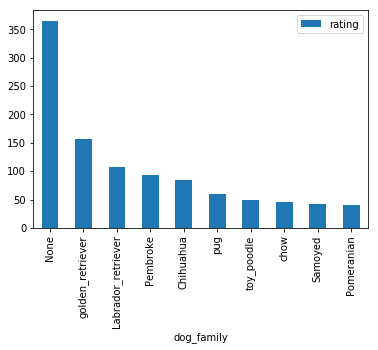

In [59]:
ax = df_top_dog.plot.bar(stacked=True)

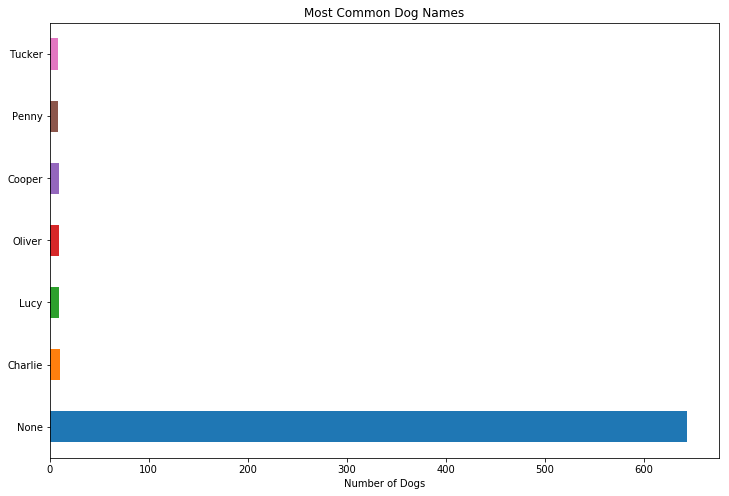

In [84]:
merge_dogs.name.value_counts()[0:7].plot('barh', figsize=(12,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");

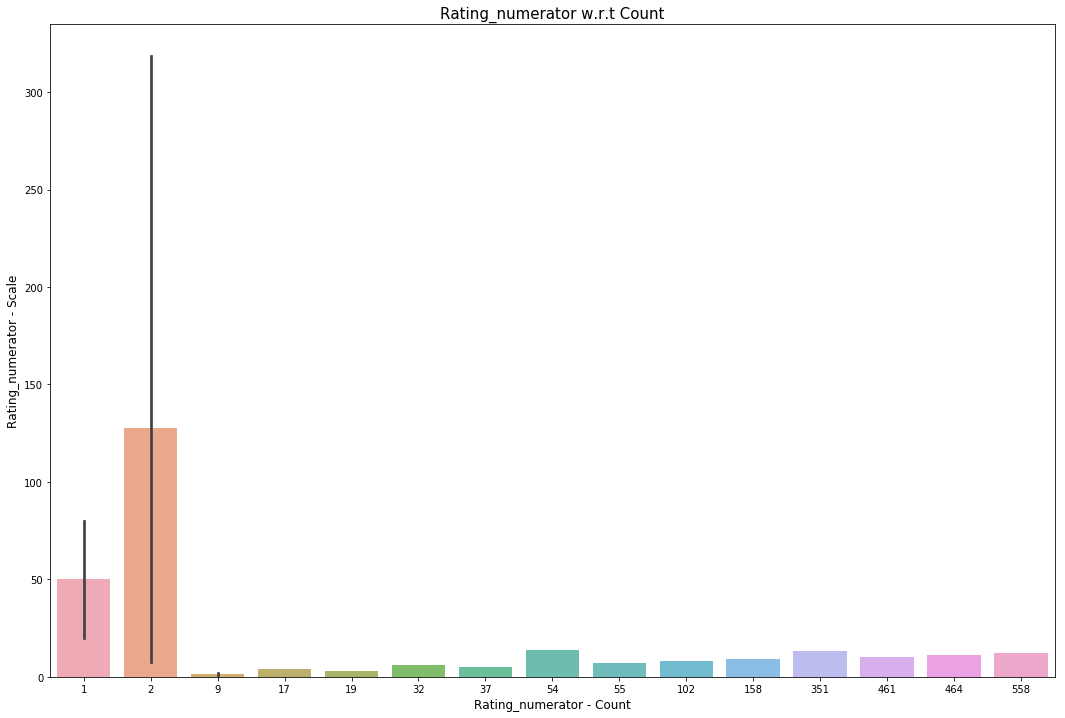

In [78]:
cnt_srs = df['rating_numerator'].value_counts().head(20)
plt.figure(figsize=(18,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Rating_numerator - Count', fontsize=12)
plt.ylabel('Rating_numerator - Scale', fontsize=12)
plt.title("Rating_numerator w.r.t Count", fontsize=15)
plt.show()